In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
labeled_tags = pd.read_csv("Labeled.csv")

In [3]:
labeled_tags.head()

,DWG Number,Tag,Area,Type,Loop Number,Location,Description,Manufacturer,Model Number,Comment,...,Sequence Number,Suffix,Instrument Spec,Spec Issued,PO Issued,Signal Type 1,Signal Type 2,Signal Type 3,Unit_Label,Gateway_Label
0,PID-143,20-ZSC-7753.,NaN,ZSC,NaN,NaN,Closed Detection,NaN,NaN,NaN,...,53.0,.,NaN,NaN,NaN,DIASI,NONE,NONE,0,5
1,PID-143,20-XY-4101C,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,NaN,NaN,...,1.0,C,NaN,NaN,NaN,DOASI,NONE,NONE,0,5
2,PID-143,20-ZSC-4101A,NaN,ZSC,NaN,NaN,Closed Detection,NaN,NaN,NaN,...,1.0,A,NaN,NaN,NaN,DIASI,NONE,NONE,0,5
3,PID-143,20-ZIS-4102K,NaN,ZIS,NaN,NaN,Pig Sensor,NaN,NaN,NaN,...,2.0,K,NaN,NaN,NaN,DIASI,NONE,NONE,0,5
4,PID-143,20-XY-4101E,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,NaN,NaN,...,1.0,E,NaN,NaN,NaN,DOASI,NONE,NONE,0,5


#### pickle file is generated by the application itself. Original csv file is imported into dataframe with some location information and then pickled.

In [4]:
file = open("temp_model.pickle",'rb')
df = pickle.load(file)
df.head()

,DWG Number,ASIGateway_label,RLocation,Tag,Area,Type,Loop Number,Location,Description,Manufacturer,...,Supplied By,Status,Sequence Number,Suffix,Instrument Spec,Spec Issued,PO Issued,Signal Type 1,Signal Type 2,Signal Type 3
0,PID-143,1,NaN,20-ZSC-7753.,NaN,ZSC,NaN,NaN,Closed Detection,NaN,...,With assembly,New,53.0,.,NaN,NaN,NaN,DIASI,NONE,NONE
1,PID-143,1,NaN,20-XY-4101C,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,...,With assembly,NaN,1.0,C,NaN,NaN,NaN,DOASI,NONE,NONE
2,PID-143,1,NaN,20-ZSC-4101A,NaN,ZSC,NaN,NaN,Closed Detection,NaN,...,With assembly,NaN,1.0,A,NaN,NaN,NaN,DIASI,NONE,NONE
3,PID-143,1,NaN,20-ZIS-4102K,NaN,ZIS,NaN,NaN,Pig Sensor,NaN,...,With assembly,NaN,2.0,K,NaN,NaN,NaN,DIASI,NONE,NONE
4,PID-143,1,NaN,20-XY-4101E,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,...,With assembly,NaN,1.0,E,NaN,NaN,NaN,DOASI,NONE,NONE


In [5]:
df.dtypes

DWG Number           object
ASIGateway_label      int32
RLocation            object
Tag                  object
Area                float64
Type                 object
Loop Number         float64
Location            float64
Description          object
Manufacturer        float64
Model Number        float64
Comment             float64
Class Name           object
PnPID                 int64
Area No             float64
Unit No             float64
Supplied By          object
Status               object
Sequence Number     float64
Suffix               object
Instrument Spec     float64
Spec Issued         float64
PO Issued           float64
Signal Type 1        object
Signal Type 2        object
Signal Type 3        object
dtype: object

In [6]:
lats = []
lons = []

for row in df['RLocation']:
    if type(row) != str:
        lat,lon = (None,None)
    else:
        lat,lon = tuple(str(row).split(','))
        lat = int(lat)
        lon = int(lon)
    lats.append(lat)
    lons.append(lon)
df["Lat"] = lats
df["Long"] = lons 

In [7]:
df['RLocation'].notna().head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
Name: RLocation, dtype: bool

In [62]:
df_located

,RLocation,Lat,Long,unit_label
5,"271,117",271.0,117.0,0
7,"274,113",274.0,113.0,0
9,"271,111",271.0,111.0,0
14,"275,114",275.0,114.0,0
20,"273,113",273.0,113.0,0
24,"268,117",268.0,117.0,0
33,"771,375",771.0,375.0,1
34,"769,371",769.0,371.0,1
37,"769,381",769.0,381.0,1
53,"540,383",540.0,383.0,2


In [8]:
df_located = df[['RLocation','Lat','Long']][df['RLocation'].notna()]

In [9]:
df_located.describe()

,Lat,Long
count,36.000000,36.000000
mean,376.694444,289.444444
std,157.787528,197.190473
min,264.000000,83.000000
25%,274.000000,115.500000
50%,298.000000,158.500000
75%,537.500000,526.000000
max,771.000000,563.000000


In [10]:
X = np.array(df_located)
X = X[:,1:3]

In [11]:
X[:20]

array([[271.0, 117.0],
       [274.0, 113.0],
       [271.0, 111.0],
       [275.0, 114.0],
       [273.0, 113.0],
       [268.0, 117.0],
       [771.0, 375.0],
       [769.0, 371.0],
       [769.0, 381.0],
       [540.0, 383.0],
       [542.0, 380.0],
       [539.0, 516.0],
       [537.0, 513.0],
       [546.0, 94.0],
       [548.0, 90.0],
       [546.0, 83.0],
       [300.0, 159.0],
       [298.0, 154.0],
       [293.0, 158.0],
       [301.0, 156.0]], dtype=object)

#### With the location tagging tool used in Tkinter, variation of the location information is introduced by the operator. Instrument Tags location could be contain slight variation of location but is designated to what is meant to be the same exact location. With the semi-filled locations, we will first use a cluster algorithm to group labeled location into its mean location. This effectively bin the exact tagged location for each instrument tag into process units. 

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [13]:
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
# Higher min_samples or lower eps indicate higher density necessary to form a cluster.
db = DBSCAN(eps=0.1, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 0


<Figure size 640x480 with 1 Axes>

In [14]:
db.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0], dtype=int64)

#### With the small adjustment in eps(cluster radius) and min_sample(minimum cluster size) we were able to group locations into clusters that represent unit. This allow us to bin the locations into each unit.

In [15]:
df_located["unit_label"] = db.labels_

In [16]:
df_located.index

Int64Index([  5,   7,   9,  14,  20,  24,  33,  34,  37,  53,  57,  65,  72,
             79,  82,  84, 103, 112, 114, 142, 158, 172, 199, 201, 216, 220,
            225, 235, 244, 259, 268, 291, 295, 299, 308, 312],
           dtype='int64')

In [17]:
df["unit_label"] = None
df.iloc[df_located.index, -1] = db.labels_

In [18]:
pd.set_option('display.max_rows',100)
df.iloc[:,[0,1,-1]][df["RLocation"].notna()]

,DWG Number,ASIGateway_label,unit_label
5,PID-143,1,0
7,PID-143,1,0
9,PID-143,1,0
14,PID-143,1,0
20,PID-143,1,0
24,PID-143,1,0
33,PID-101,2,1
34,PID-101,2,1
37,PID-101,2,1
53,PID-102,2,2


#### We can now use unit_label enumeration as a target variable. This effectively bined the locations into categorical variables. We can use these labeled location now as training set for the machine learning algorithm to classify each intrument tags into the location. In this data set, this will be trivial since P&ID number is tied directly 1 to 1 with the location. None the less, we can mix other attributes in and provide a general framework for predicting the location of the instrument tag.

In [19]:
groupby_unit_label_Lat = df[df['Lat'].notnull()].groupby('unit_label').mean()[['Lat','Long']]

In [20]:
groupby_unit_label_Lat = groupby_unit_label_Lat.rename(columns={'Lat':'Lat_mean','Long':'Long_mean'})

In [21]:
df = df.merge(groupby_unit_label_Lat, how = 'left', right_index = True, left_on = 'unit_label')

#### We assign the centroid or the mean of each cluster into its respective row.

In [22]:
df.iloc[:,:15]

,DWG Number,ASIGateway_label,RLocation,Tag,Area,Type,Loop Number,Location,Description,Manufacturer,Model Number,Comment,Class Name,PnPID,Area No
0,PID-143,1,NaN,20-ZSC-7753.,NaN,ZSC,NaN,NaN,Closed Detection,NaN,NaN,NaN,FMC Instrument Bubble,831,20.0
1,PID-143,1,NaN,20-XY-4101C,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,NaN,NaN,General Instrument Symbol,852,20.0
2,PID-143,1,NaN,20-ZSC-4101A,NaN,ZSC,NaN,NaN,Closed Detection,NaN,NaN,NaN,FMC Instrument Bubble,859,20.0
3,PID-143,1,NaN,20-ZIS-4102K,NaN,ZIS,NaN,NaN,Pig Sensor,NaN,NaN,NaN,FMC Instrument Bubble,899,20.0
4,PID-143,1,NaN,20-XY-4101E,NaN,XY,NaN,NaN,3-Way Solenoid Valve,NaN,NaN,NaN,General Instrument Symbol,906,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,PID-142,1,NaN,20-ZSC-4103G,NaN,ZSC,NaN,NaN,Closed Detection,NaN,NaN,NaN,FMC Instrument Bubble,7234,20.0
348,PID-142,1,NaN,20-ZIS-4105K,NaN,ZIS,NaN,NaN,Pig Sensor,NaN,NaN,NaN,FMC Instrument Bubble,7248,20.0
349,PID-142,1,NaN,20-ZSC/O-4104E,NaN,ZSC/O,NaN,NaN,Closed and Open Detection,NaN,NaN,NaN,FMC Instrument Bubble,7296,20.0
350,PID-142,1,NaN,20-ZIS-4103J,NaN,ZIS,NaN,NaN,Pig Sensor,NaN,NaN,NaN,FMC Instrument Bubble,7313,20.0


In [23]:
df.iloc[:,15:]

,Unit No,Supplied By,Status,Sequence Number,Suffix,Instrument Spec,Spec Issued,PO Issued,Signal Type 1,Signal Type 2,Signal Type 3,Lat,Long,unit_label,Lat_mean,Long_mean
0,77.0,With assembly,New,53.0,.,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN
1,41.0,With assembly,NaN,1.0,C,NaN,NaN,NaN,DOASI,NONE,NONE,NaN,NaN,None,NaN,NaN
2,41.0,With assembly,NaN,1.0,A,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN
3,41.0,With assembly,NaN,2.0,K,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN
4,41.0,With assembly,NaN,1.0,E,NaN,NaN,NaN,DOASI,NONE,NONE,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,41.0,With assembly,NaN,3.0,G,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN
348,41.0,With assembly,NaN,5.0,K,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN
349,41.0,NaN,NaN,4.0,E,NaN,NaN,NaN,DIASI,DIASI,NONE,NaN,NaN,None,NaN,NaN
350,41.0,With assembly,NaN,3.0,J,NaN,NaN,NaN,DIASI,NONE,NONE,NaN,NaN,None,NaN,NaN


#### For classification of binned location to be accuract, we will run the set of classification algorithms on a subset of attributes that may be relevant to location information.

In [24]:
df[['Area No','Unit No','Sequence Number']] = df[['Area No','Unit No','Sequence Number']].applymap(str)

In [25]:
#df_encoded = pd.get_dummies(df[['DWG Number']], prefix=['DWG Number'])
df_encoded = pd.get_dummies(df[['DWG Number', 'Area No','Unit No']], prefix=['DWG Number', 'Area No','Unit No'])
#df_encoded = pd.get_dummies(df[['DWG Number','Type','Description','Suffix','Signal Type 1']], prefix=['DWG','Type','Description','Suffix','Signal Type 1'])

In [26]:
#df_numeric = df[['Area No','Unit No','Sequence Number']]
#df_numeric.head(20)

In [27]:
normalized_df = df_encoded

In [28]:
normalized_df.shape

(352, 24)

In [29]:
normalized_df.iloc[:,-40:].head()

,DWG Number_PID-101,DWG Number_PID-102,DWG Number_PID-103,DWG Number_PID-111,DWG Number_PID-121,DWG Number_PID-122,DWG Number_PID-123,DWG Number_PID-131,DWG Number_PID-132,DWG Number_PID-133,...,Area No_nan,Unit No_1.0,Unit No_11.0,Unit No_2.0,Unit No_21.0,Unit No_3.0,Unit No_31.0,Unit No_41.0,Unit No_77.0,Unit No_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### We drop the NA rows for rows with tagged location. Then we save the index of these cleaned training rows

In [30]:
train_index = normalized_df[df["RLocation"].notna()].dropna().index
test_index = normalized_df[df["RLocation"].isna()].dropna().index

In [64]:
print(train_index.shape)
test_index.shape

(36,)

#### We run KNN algorithm to predict the process unit location bin and the mean location itself.

In [35]:
from sklearn import tree
model_clf = tree.DecisionTreeClassifier()


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=3, metric='jaccard')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='jaccard',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [369]:
from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier(n_estimators=20, learning_rate=1.3)

In [325]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [ ]:
from sklearn import svm
model_svm = svm.SVC()

In [383]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model_bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=3, metric='jaccard'), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5)

### Performance Evaluation

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.utils.random import sample_without_replacement

In [304]:
#This function Decodes dummy variables back to integer representation
def decodeDummies(y_pred):
    y_pred_arr = []
    y_pred_arr = np.array(y_pred_arr,dtype=str)
    No_Out_list = []
    
    for j, row in enumerate(y_pred):
        for i,v in enumerate(row):
            if v: y_pred_arr = np.append(y_pred_arr,i)
        if sum(row) == 0: 
            #print("nothing at j: " + str(j))
            No_Out_list = np.append(No_Out_list,j)
            y_pred_arr = np.append(y_pred_arr, -1)
    return y_pred_arr, No_Out_list

#This function returns the accuracy and contignency matrix for given subset tagged of instrumentation
def testClassification(df,normalized_df, model, labeled_tags, train_index,test_index):
    X = np.array(normalized_df.iloc[train_index,:])
    y = np.array(pd.get_dummies(df.iloc[train_index,:]["unit_label"]))
    
    fitted_model = model.fit(X, y)
    X_test = np.array(normalized_df.iloc[test_index,:])
    y_pred = fitted_model.predict(X_test)
    
    tst_actual = labeled_tags["Unit_Label"].iloc[test_index].values
    tst_actual = tst_actual.astype(str)
   
    
    y_pred_arr, No_Out_list = decodeDummies(y_pred)
    
    accuracy = accuracy_score( tst_actual.astype(str), y_pred_arr.astype(str))
    c_matrix = confusion_matrix(tst_actual, y_pred_arr)
    #print(accuracy)
    return accuracy, c_matrix
    

In [347]:
#Sample Train index with variouse sparse level of user input. 
#Distribute the remaining unsampled index as test index
#Check accuracy at variouse sparse level
def reportAccuracyVersusSparsityOfInput(df,normalized_df, model, labeled_tags, train_index,test_index, percent):
    N_train = train_index.shape[0]
    train_subset_index = sample_without_replacement(N_train,N_train*percent/100)
    subset_train_index = train_index[train_subset_index]
    test_index_updated = set(train_index).union(set(test_index)).difference(set(subset_train_index))
    #print(train_subset_index)
    #print(set(subset_train_index))
    #print(list(test_index_updated))
    accuracy, c_matrix = testClassification(df,normalized_df, model, labeled_tags, list(subset_train_index),list(test_index_updated))
    #print(accuracy)
    #print(c_matrix)
    return accuracy

def trySparseRange(df,normalized_df, model, labeled_tags, train_index,test_index):
    accuracy_range = []
    for percent in range(20,105,5):
        #print("Percent: " + str(percent)+"%")
        run_count = 10
        sum_accuracy = 0
        for i in range(run_count):
            sum_accuracy+=reportAccuracyVersusSparsityOfInput(df,normalized_df, model_knn, labeled_tags, train_index,test_index,percent)
        #print(sum_accuracy/run_count)
        #print("-"*27)
        accuracy_range.append(sum_accuracy/run_count)
    return accuracy_range

### KNN Classifier

In [373]:
knn_eval = trySparseRange(df,normalized_df, model_knn, labeled_tags, train_index,test_index)
tree_eval = trySparseRange(df,normalized_df, model_tree, labeled_tags, train_index,test_index)
rf_eval = trySparseRange(df,normalized_df, model_rf, labeled_tags, train_index,test_index)
svm_eval = trySparseRange(df,normalized_df, model_svm, labeled_tags, train_index,test_index)
ab_eval = trySparseRange(df,normalized_df, model_ab, labeled_tags, train_index,test_index)

C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\An

C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [384]:
bagging_knn_eval = trySparseRange(df,normalized_df, model_bagging_knn, labeled_tags, train_index,test_index)

C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Zhimin90\An

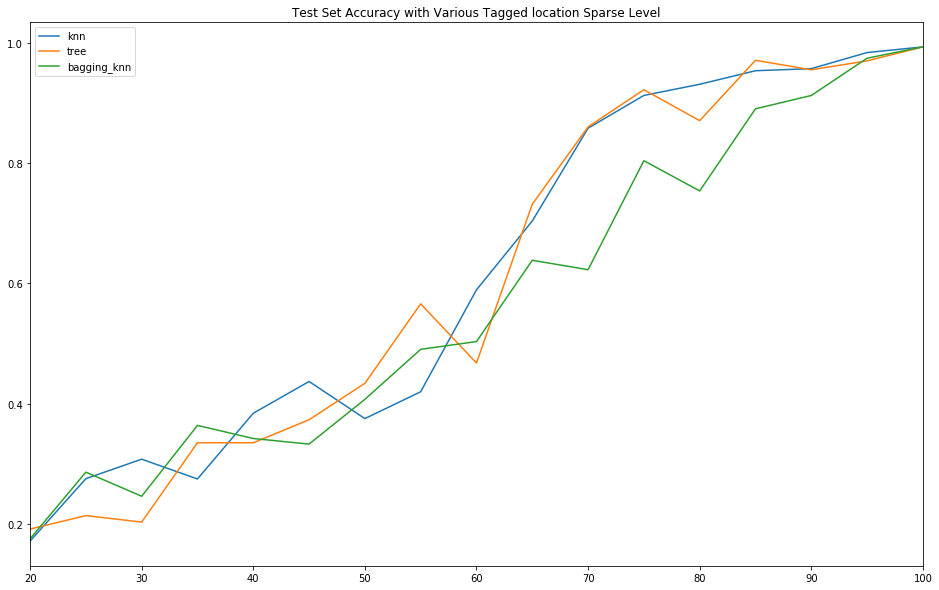

In [385]:
pd.DataFrame({'knn':knn_eval,'tree':tree_eval,'bagging_knn':bagging_knn_eval}, 
             index=range(20,105,5)).plot(figsize=(16,10), 
            title='Test Set Accuracy with Various Tagged location Sparse Level')

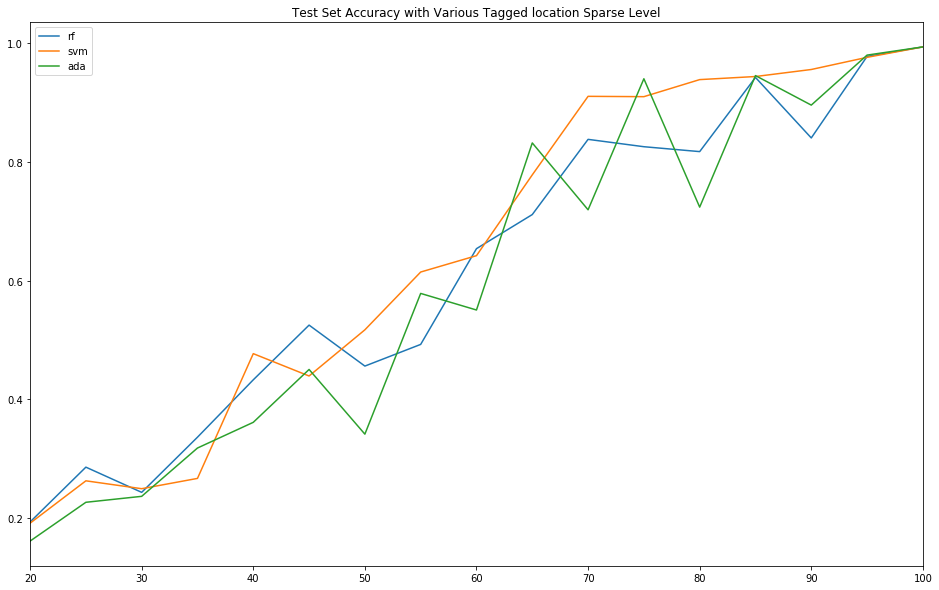

In [375]:
pd.DataFrame({'rf':rf_eval,'svm':svm_eval,'ada':ab_eval}, 
             index=range(20,105,5)).plot(figsize=(16,10), 
            title='Test Set Accuracy with Various Tagged location Sparse Level')

### Begining of Experiment with Matrix Factorization

#### Below is a experimental attempt to use Matrix Factorization to reconstruct the missing unit information in the full dataset. This is a parallel step to KNN algoritm above with the goal of filling missing location bins.

In [62]:
from sklearn import preprocessing

#### Save index of the full dataset without NA

In [63]:
full_index = normalized_df.dropna().index

In [64]:
full_index.shape

(352,)

In [65]:
unit_label = pd.get_dummies(df.iloc[full_index,:]["unit_label"])

In [66]:
label_arr = np.array(unit_label)

In [67]:
normalized_df.iloc[0,:]

DWG Number_PID-101    0
DWG Number_PID-102    0
DWG Number_PID-103    0
DWG Number_PID-111    0
DWG Number_PID-121    0
DWG Number_PID-122    0
DWG Number_PID-123    0
DWG Number_PID-131    0
DWG Number_PID-132    0
DWG Number_PID-133    0
DWG Number_PID-141    0
DWG Number_PID-142    0
DWG Number_PID-143    1
Area No_20.0          1
Area No_nan           0
Unit No_1.0           0
Unit No_11.0          0
Unit No_2.0           0
Unit No_21.0          0
Unit No_3.0           0
Unit No_31.0          0
Unit No_41.0          0
Unit No_77.0          1
Unit No_nan           0
Name: 0, dtype: uint8

In [68]:
normalized_df.iloc[full_index,:]

,DWG Number_PID-101,DWG Number_PID-102,DWG Number_PID-103,DWG Number_PID-111,DWG Number_PID-121,DWG Number_PID-122,DWG Number_PID-123,DWG Number_PID-131,DWG Number_PID-132,DWG Number_PID-133,...,Area No_nan,Unit No_1.0,Unit No_11.0,Unit No_2.0,Unit No_21.0,Unit No_3.0,Unit No_31.0,Unit No_41.0,Unit No_77.0,Unit No_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(normalized_df.iloc[full_index,:])
X_full = min_max_scaler.transform(normalized_df.iloc[full_index,:])

In [70]:
X_full

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [71]:
X_full.shape

(352, 24)

In [72]:
label_arr.shape

(352, 7)

In [73]:
X_full.shape[1] + label_arr.shape[1]

31

In [74]:
GradientDescent_Flag_Mat = np.zeros((X_full.shape[0],X_full.shape[1] + label_arr.shape[1]))

In [75]:
GradientDescent_Flag_Mat.shape

(352, 31)

In [76]:
for i, row in enumerate(label_arr):
    if sum(row) == 0:
        GradientDescent_Flag_Mat[X_full.shape[1]+1,:] = True
        GradientDescent_Flag_Mat[i,:X_full.shape[1]] = False
    else:
        GradientDescent_Flag_Mat[i,:] = False
GradientDescent_Flag_Mat[2,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
X_full = np.hstack([X_full,label_arr])

In [78]:
X_full.shape

(352, 31)

In [79]:
def matrix_factorization(R, P, Q, K,Flag_Mat, steps=3000, alpha=0.0002, beta=0.02):
    
    ### R = The user x item rating matrix (m x n)
    ### P = Initial user-factor matrix (m x k)
    ### Q = Initial item-factor matrix (n x k)
    ### K = The number of latent factors (features)
    ### steps = The number of epochs in gradient descent
    ### alpha = The learning rate for gradient descent
    ### beta = The regularization coefficient
    
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if Flag_Mat[i][j] == False:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        ### update P and Q based on the partial derivatives
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if Flag_Mat[i][j] == False:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
        print("Step %d of %d; Error: %0.5f; Time: %0.2f" %(step+1, steps, e, time()))
    return P, Q.T

In [80]:
#Ratings = np.array(pd.DataFrame(X_full).fillna(0))
Ratings = np.array(X_full)

In [81]:
X_full.shape[1]

31

In [82]:
M = X_full.shape[0]
N = X_full.shape[1]
K = 31
steps = 1

In [83]:
### Initialize P and Q to random values
P = np.random.rand(M,K)
Q = np.random.rand(N,K)

In [84]:
from time import time
t0 = time()
fP, fQ = matrix_factorization(Ratings, P, Q, K, GradientDescent_Flag_Mat, steps=steps)
print("done in %0.3fs." % (time() - t0))

Step 1 of 100; Error: 76151.89292; Time: 1583691943.29
Step 2 of 100; Error: 13433.18121; Time: 1583691945.40
Step 3 of 100; Error: 5253.88691; Time: 1583691947.46
Step 4 of 100; Error: 4115.04066; Time: 1583691949.53
Step 5 of 100; Error: 3906.72441; Time: 1583691951.54
Step 6 of 100; Error: 3821.87040; Time: 1583691953.57
Step 7 of 100; Error: 3754.53264; Time: 1583691955.62
Step 8 of 100; Error: 3691.16874; Time: 1583691957.69
Step 9 of 100; Error: 3630.13900; Time: 1583691959.79
Step 10 of 100; Error: 3571.23335; Time: 1583691961.83
Step 11 of 100; Error: 3514.37672; Time: 1583691963.83
Step 12 of 100; Error: 3459.49434; Time: 1583691965.86
Step 13 of 100; Error: 3406.50757; Time: 1583691967.86
Step 14 of 100; Error: 3355.33819; Time: 1583691969.87
Step 15 of 100; Error: 3305.91059; Time: 1583691971.89
Step 16 of 100; Error: 3258.15252; Time: 1583691973.90
Step 17 of 100; Error: 3211.99520; Time: 1583691975.95
Step 18 of 100; Error: 3167.37325; Time: 1583691977.92
Step 19 of 100; E

In [85]:
Preds = np.dot(fP,fQ.T)

In [86]:
Ratings[49]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
a = 49
for i in range(len(Ratings[a,:])):
    print(Ratings[a,i])
    print(Preds[a,i])
    print("*"*50)

0.0
0.030545388027983608
**************************************************
1.0
0.10957351675992831
**************************************************
0.0
-0.1951198662910647
**************************************************
0.0
0.028313157606367143
**************************************************
0.0
-0.0270932209040338
**************************************************
0.0
0.06789101507669548
**************************************************
0.0
0.06628002474258438
**************************************************
0.0
-0.03297318321772984
**************************************************
0.0
-0.12592805721110012
**************************************************
0.0
0.13971137186277374
**************************************************
0.0
0.01909401430059453
**************************************************
0.0
0.05813450449099999
**************************************************
0.0
0.1027868814529072
**************************************************
1.0
0.8563285607843159

### End of Experiment

#### Encode(convert dummy variables back to integer) KNN results for back filling location information back to groups

In [88]:
y_pred_arr = []
No_Out_list = []
for j, row in enumerate(y_pred):
    for i,v in enumerate(row):
        if v: y_pred_arr = np.append(y_pred_arr,i)
    if sum(row) == 0: 
        print("nothing at j: " + str(j))
        No_Out_list = np.append(No_Out_list,j)
        y_pred_arr = np.append(y_pred_arr, None)

In [89]:
y_pred_arr.shape

(316,)

In [90]:
[int(i) for i in No_Out_list]

[]

In [91]:
normalized_df.iloc[test_index[[int(i) for i in No_Out_list]],:].iloc[:,10:]

,DWG Number_PID-141,DWG Number_PID-142,DWG Number_PID-143,Area No_20.0,Area No_nan,Unit No_1.0,Unit No_11.0,Unit No_2.0,Unit No_21.0,Unit No_3.0,Unit No_31.0,Unit No_41.0,Unit No_77.0,Unit No_nan


In [92]:
df.iloc[test_index[[int(i) for i in No_Out_list]],:]

,DWG Number,ASIGateway_label,RLocation,Tag,Area,Type,Loop Number,Location,Description,Manufacturer,...,Spec Issued,PO Issued,Signal Type 1,Signal Type 2,Signal Type 3,Lat,Long,unit_label,Lat_mean,Long_mean


In [93]:
y_pred_arr.shape

(316,)

In [94]:
groupby_unit_label_Lat

,Lat_mean,Long_mean
unit_label,,
0,271.181818,114.363636
1,769.666667,375.666667
2,541.000000,381.500000
3,538.000000,514.500000
4,546.666667,89.000000
5,298.333333,156.666667
6,297.888889,559.555556


#### We can now use the predicted unit label to append the location of the instrument

In [95]:
df['pre_unit_label'] = None

In [96]:
df['pre_unit_label'] = pd.Series(y_pred_arr,index=test_index)

In [97]:
df.iloc[60,]

DWG Number                        PID-102
ASIGateway_label                        2
RLocation                             NaN
Tag                          20-ZSC-0201B
Area                                  NaN
Type                                  ZSC
Loop Number                           NaN
Location                              NaN
Description              Closed Detection
Manufacturer                          NaN
Model Number                          NaN
Comment                               NaN
Class Name          FMC Instrument Bubble
PnPID                                2013
Area No                              20.0
Unit No                               2.0
Supplied By                 With assembly
Status                                NaN
Sequence Number                       1.0
Suffix                                  B
Instrument Spec                       NaN
Spec Issued                           NaN
PO Issued                             NaN
Signal Type 1                     

In [98]:
groupby_unit_label_Lat = groupby_unit_label_Lat.rename(columns={'Lat_mean':'pre_Lat_mean','Long_mean':'pre_Long_mean'})

In [99]:
df = df.merge(groupby_unit_label_Lat, how = 'left', right_index = True, left_on = 'pre_unit_label')

In [100]:
df[['DWG Number', 'RLocation', 'Tag', 'unit_label','pre_unit_label']].iloc[250:300,:]

,DWG Number,RLocation,Tag,unit_label,pre_unit_label
250,PID-132,NaN,20-XY-3105E,None,6.0
251,PID-132,NaN,20-ZIS-3104K,None,6.0
252,PID-132,NaN,20-XY-3103A,None,6.0
253,PID-132,NaN,20-ZIS-3104J,None,6.0
254,PID-132,NaN,20-ZIS-3105J,None,6.0
255,PID-132,NaN,20-ZIS-3105K,None,6.0
256,PID-132,NaN,20-ZSC-3103G,None,6.0
257,PID-132,NaN,20-XY-3104A,None,6.0
258,PID-132,NaN,20-ZSC/O-3105E,None,6.0
259,PID-133,"298,558",20-ZIS-3101J,6,NaN


In [101]:
df.columns

Index(['DWG Number', 'ASIGateway_label', 'RLocation', 'Tag', 'Area', 'Type',
       'Loop Number', 'Location', 'Description', 'Manufacturer',
       'Model Number', 'Comment', 'Class Name', 'PnPID', 'Area No', 'Unit No',
       'Supplied By', 'Status', 'Sequence Number', 'Suffix', 'Instrument Spec',
       'Spec Issued', 'PO Issued', 'Signal Type 1', 'Signal Type 2',
       'Signal Type 3', 'Lat', 'Long', 'unit_label', 'Lat_mean', 'Long_mean',
       'pre_unit_label', 'pre_Lat_mean', 'pre_Long_mean'],
      dtype='object')

In [102]:
check_result_df = df[['DWG Number', 'Tag', 'Signal Type 1', 'Lat',
       'Long', 'unit_label', 'Lat_mean', 'Long_mean', 'pre_unit_label', 'pre_Lat_mean', 'pre_Long_mean']]
check_result_df.iloc[100:200,]

,DWG Number,Tag,Signal Type 1,Lat,Long,unit_label,Lat_mean,Long_mean,pre_unit_label,pre_Lat_mean,pre_Long_mean
100,PID-121,20-ZIS-2106J,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
101,PID-121,20-XY-2108A,DOASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
102,PID-121,20-ZIS-2108K,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
103,PID-121,20-XY-2108P,DOASI,300.0,159.0,5,298.333333,156.666667,NaN,NaN,NaN
104,PID-121,20-XY-2106E,DOASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
105,PID-121,20-ZSC-2106A,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
106,PID-121,20-ZSO-2107H,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
107,PID-121,20-ZSC/O-2107E,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
108,PID-121,20-XY-2107A,DOASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667
109,PID-121,20-ZSO-2108H,DIASI,NaN,NaN,None,NaN,NaN,5.0,298.333333,156.666667


In [103]:
combined_location_df = check_result_df[['Lat_mean', 'Long_mean',
       'pre_Lat_mean', 'pre_Long_mean']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [104]:
combined_location_df = combined_location_df.str.split(',',expand=True)

In [105]:
check_result_df[['cL_Lat', 'cL_Long']] = combined_location_df

C:\Users\Zhimin90\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [106]:
plot_df = check_result_df[['Tag','cL_Lat','cL_Long']]

In [107]:
plot_df = plot_df[['cL_Lat', 'cL_Long']].apply(pd.to_numeric)

In [108]:
plot_bygroup_df = plot_df.groupby(['cL_Lat', 'cL_Long']).size().reset_index(name='count')

In [109]:
plot_bygroup_df

,cL_Lat,cL_Long,count
0,271.181818,114.363636,95
1,297.888889,559.555556,93
2,298.333333,156.666667,91
3,538.000000,514.500000,17
4,541.000000,381.500000,17
5,546.666667,89.000000,22
6,769.666667,375.666667,17


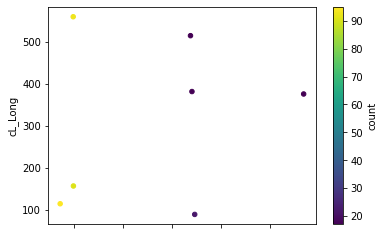

In [110]:
plot_bygroup_df.plot.scatter(x='cL_Lat',y='cL_Long',c='count',colormap='viridis')

In [111]:
plot_df[['cL_Lat', 'cL_Long']].dropna()

,cL_Lat,cL_Long
0,271.181818,114.363636
1,271.181818,114.363636
2,271.181818,114.363636
3,271.181818,114.363636
4,271.181818,114.363636
...,...,...
347,271.181818,114.363636
348,271.181818,114.363636
349,271.181818,114.363636
350,271.181818,114.363636


In [112]:
nonNAN_index = plot_df[['cL_Lat', 'cL_Long']].dropna().index

In [113]:
X = np.array(plot_df.iloc[nonNAN_index,:][['cL_Lat', 'cL_Long']] )

In [114]:
len(nonNAN_index)

352

In [115]:
X[60]

array([541. , 381.5])

In [116]:
X.shape

(352, 2)

In [117]:
type(X[0,0])

numpy.float64

In [118]:
 np.isfinite(X).all()

True

In [119]:
X.shape

(352, 2)

In [120]:
int(np.ceil(X.shape[0]/50))

8

In [121]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=int(np.ceil(X.shape[0]/50)), random_state=0).fit(X)

C:\Users\Zhimin90\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


In [122]:
kmeans.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

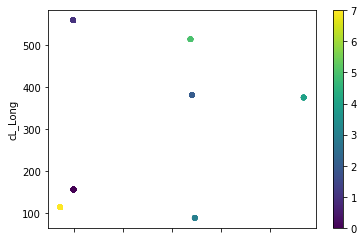

In [123]:
plot_df.iloc[nonNAN_index,:].plot.scatter(x='cL_Lat',y='cL_Long',c=kmeans.labels_,colormap='viridis')

### KMean cluster does not allow us to set the maximum number of tags per cluster. ASi gateways limits 60 devices per gateway which means there needs to be an inherent maximum point in cluster limit we can allow per cluster. For this, we will modify DBScan clustering algorithm. DBScan algorithm is used since density is already a factor in the algoritm itself. The cluster grow until it reaches the edge.

### With DBScan algorithm, we can limit the cluster growth once the overall cluster point limit has been reached. We will achieve this by conditionally the FOR loop that handles cluster growth. Once maximum cluster point limit has been reached, we will simply return the unassigned points from the current cluster back to the original neighbor search list. This allows each point to be explored by the algorithm even if they are not an edge to a cluster. 

In [124]:
from dbscan import MyDBSCAN
from sklearn.preprocessing import StandardScaler

In [125]:
X.shape

(352, 2)

In [126]:
X_normalized = StandardScaler().fit_transform(X)

In [127]:
X_normalized

array([[-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [-0.61498156, -0.88348379],
       [ 3.15643376,  0.46012362],
       [ 3.15643376,

#### MaxPts is the maximum number of tags each cluster can hold

In [128]:
print ('Running my implementation...')
my_labels = np.array(MyDBSCAN(X_normalized, eps=.2, MinPts=20, MaxPts = 100))

Running my implementation...
{}
Growing Cluster
Completed
{1: 96}
Growing Cluster
Completed
{1: 96, 2: 18}
Growing Cluster
Completed
{1: 96, 2: 35}
Growing Cluster
Completed
{1: 96, 2: 52}
Growing Cluster
Completed
{1: 96, 2: 74}
Growing Cluster
{1: 96, 2: 101}
Growing Cluster
Completed
{1: 96, 2: 101, 3: 65}
Growing Cluster
{1: 96, 2: 101, 3: 101}
Growing Cluster
Completed


In [129]:
core_samples_mask = np.zeros_like(my_labels, dtype=bool)
core_samples_mask[np.array(range(0,len(my_labels)))] = True
labels = my_labels

In [130]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]


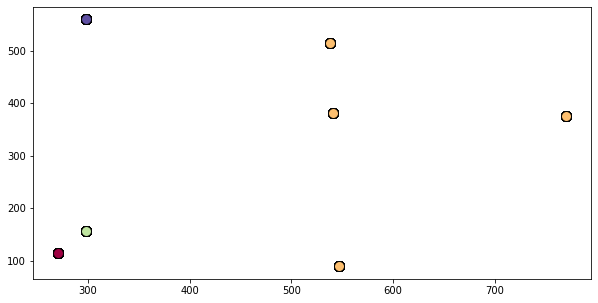

In [131]:
plt.figure(figsize=(10,5)) 
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    #print(k)
    class_member_mask = (my_labels == k)
    #print(my_labels == k)
    xy = X[class_member_mask & core_samples_mask]
    #print(xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    #print(xy)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [132]:
clusterDict = {}
for label in labels:
    if label in clusterDict.keys():
        clusterDict[label] += 1
    else:
        clusterDict[label] = 1

In [133]:
check_result_df.iloc[nonNAN_index,:].shape[1]

13

In [134]:
dbscan_labeled = check_result_df.iloc[nonNAN_index,:]
dbscan_labeled["Gateway_Label"] = my_labels

In [135]:
clusterDict

{1: 95, 2: 100, 3: 100, 4: 57}

In [136]:
my_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Taking a closer look at individual cluster grouping

In [137]:
dbscan_labeled[['DWG Number', 'Gateway_Label', 'Tag','unit_label',
       'cL_Lat', 'cL_Long']].sort_values(by=['cL_Lat','cL_Long']).iloc[0:100,:]

,DWG Number,Gateway_Label,Tag,unit_label,cL_Lat,cL_Long
0,PID-143,1,20-ZSC-7753.,None,271.1818181818182,114.36363636363636
1,PID-143,1,20-XY-4101C,None,271.1818181818182,114.36363636363636
2,PID-143,1,20-ZSC-4101A,None,271.1818181818182,114.36363636363636
3,PID-143,1,20-ZIS-4102K,None,271.1818181818182,114.36363636363636
4,PID-143,1,20-XY-4101E,None,271.1818181818182,114.36363636363636
5,PID-143,1,20-XY-4102E,0,271.1818181818182,114.36363636363636
6,PID-143,1,20-XY-4101B,None,271.1818181818182,114.36363636363636
7,PID-143,1,20-ZSC/O-4102E,0,271.1818181818182,114.36363636363636
8,PID-143,1,20-ZSC-4101C,None,271.1818181818182,114.36363636363636
9,PID-143,1,20-ZSC/O-4102F,0,271.1818181818182,114.36363636363636


### Performance Evaluation:

#### The performance of the clustering algorithm can be judged by how close it is to the human generated instrument cluster group. In the program itself, this evaluation will not be part of the learning process. Here in the experimental phase of program development, we wish to evaluate equivalent purpose algorithms in order to choose the best performing algorithm for the final application.

#### Completeness and Homogeneity will be the metrics used to evaluate the effectiveness of the clustering algoritm

In [138]:
from sklearn.metrics import completeness_score, homogeneity_score

#### Compleness and Homogeneity Scores should be based on the ground trueth. In reality, there are many variation of the the trueth. Below set of gateway labels is one variation of the ground truth on how the gateways should be allocated to each tag. We will use these measures to see how similar the custom DBSCAN clustering algorithm is able to get to the engineered solution. 

In [139]:
labeled_tags["Unit_Label"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [140]:
dbscan_labeled['Gateway_Label'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [141]:
completeness_score(labeled_tags["Unit_Label"].values, dbscan_labeled['Gateway_Label'].values)

0.7352310133933261

In [142]:
homogeneity_score(labeled_tags["Unit_Label"].values, dbscan_labeled['Gateway_Label'].values)

0.6011718307684949

In [143]:
df.columns

Index(['DWG Number', 'ASIGateway_label', 'RLocation', 'Tag', 'Area', 'Type',
       'Loop Number', 'Location', 'Description', 'Manufacturer',
       'Model Number', 'Comment', 'Class Name', 'PnPID', 'Area No', 'Unit No',
       'Supplied By', 'Status', 'Sequence Number', 'Suffix', 'Instrument Spec',
       'Spec Issued', 'PO Issued', 'Signal Type 1', 'Signal Type 2',
       'Signal Type 3', 'Lat', 'Long', 'unit_label', 'Lat_mean', 'Long_mean',
       'pre_unit_label', 'pre_Lat_mean', 'pre_Long_mean'],
      dtype='object')

In [144]:
export_df = df[['DWG Number','Tag','Description','Signal Type 1']]

In [145]:
export_df['ASIGateway_label'] = dbscan_labeled['Gateway_Label']

C:\Users\Zhimin90\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
export_df.iloc[:100]

,DWG Number,Tag,Description,Signal Type 1,ASIGateway_label
0,PID-143,20-ZSC-7753.,Closed Detection,DIASI,1
1,PID-143,20-XY-4101C,3-Way Solenoid Valve,DOASI,1
2,PID-143,20-ZSC-4101A,Closed Detection,DIASI,1
3,PID-143,20-ZIS-4102K,Pig Sensor,DIASI,1
4,PID-143,20-XY-4101E,3-Way Solenoid Valve,DOASI,1
5,PID-143,20-XY-4102E,3-Way Solenoid Valve,DOASI,1
6,PID-143,20-XY-4101B,3-Way Solenoid Valve,DOASI,1
7,PID-143,20-ZSC/O-4102E,Closed and Open Detection,DIASI,1
8,PID-143,20-ZSC-4101C,Closed Detection,DIASI,1
9,PID-143,20-ZSC/O-4102F,Closed and Open Detection,DIASI,1


In [147]:
with open('learnedmodel.pickle', 'wb') as f:
    pickle.dump(export_df, f)